Вариант 23  

Выполнила Соловьева Елизавета 
## Плохая обусловленность метода Кардано:
[Каханер–Моулер–Нэш]

Рассмотрим знаменитые формулы для решения кубического уравнения - *формулы Кардано*,
которые правильнее было бы называть *формулами Ферро-Тартальи-Кардано-Фиора*.

Рассмотрим кубическое уравнение $y^3+ay^2+by+c=0$, где все коэффициенты и неизвестная $y$ в общем случае комплексные.

После замены $y = x-\frac{a}{3}$ в уравнении третьей степени
$y^3+ay^2+by+c=0$ исчезает член с квадратом неизвестной $y$.
Уравнение примет вид
$$
x^3+px+q=0.
$$ 
Его решения можно найти в виде 
$$
x=\alpha + \beta,
$$ 
где $\alpha$, $\beta$ --- некоторые
комплексные числа, 
$$
\alpha=\sqrt[3]{-\frac{q}{2}+\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}},
\qquad
\beta=\sqrt[3]{-\frac{q}{2}-\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}.
$$
Среди всевозможных комбинаций $\alpha$, $\beta$, получаемых при подстановке всех значений корней кубических,
необходимо выбрать лишь те,
которые удовлетворяют условию $3\alpha\beta+p=0$. 
Легко видеть, что если $\alpha \ne 0$ и $\beta\ne 0$, то
таким образом будет получено $3$ решения: для каждого из трех значений $\alpha$ можно определить единственное $\beta$. 

Реализуйте метод Кардано для нахождения корней кубического уравнения $y^3+ay^2+by+c=0$.
Написанная вами функция `y1, y2, y3 = cardano(a,b,c)` должна работать как для уравнений
с вещественными, так и комплексными коэффициентами.
Воспользуйтесь этим методом для нахождения вещественного корня уравнения
$$
y^3 +3y^2 +\lambda^2y+3\lambda^2 = 0
$$
при различных $\lambda$.
Исследуйте потерю точности из-за ошибок округления при больших $\lambda$
(в частности, для $\lambda$ порядка величины, обратной машинному эпсилон).

Сравните результаты с теми, которые получаются методом Брента `scipy.optimize.brentq` и методом Ньютона `scipy.optimize.newton`.
## Решение:
Подключим необходимые библиотеки:

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.special import cbrt

Дано кубичесткое уравнение вида:

$$
ax^3+bx^2+cx+d=0, a!=0
$$

Корни:
$$
x_1=\alpha+\beta-\frac{b}{3a}\\
x_2=-\frac{\alpha+\beta}{2}-\frac{b}{3a}-\frac{i\sqrt{3}}{3a}(\alpha-\beta)\\
x_3=-\frac{\alpha+\beta}{2}-\frac{b}{3a}+\frac{i\sqrt{3}}{3a}(\alpha-\beta)
$$

где:

$$
\alpha=\sqrt[3]{-\frac{q}{2}+\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}},
\qquad
\beta=\sqrt[3]{-\frac{q}{2}-\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}
$$

$$
Q=\frac{3ac-b^2}{9a^2}\qquad R=\frac{9abc-27a^2d-2b^3}{54a^3}
$$
$$
D=Q^3+R^2 - дискриминант
$$
Если $$D>0$$, то один действительный корень, два комплексных.

Если$$D<=0$$, то все корни действительные.


In [13]:
def cardano(a, b, c, d):
    if a == 0:
        raise ValueError('Параметр a != 0')
    x = (3*a*c - b**2)/ (9*a**2)
    k = (9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)
    D = ((3*a*c - b**2)/ (9*a**2))**3 +((9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3))**2 
    alf = cbrt(((9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)) + np.sqrt(D))
    beta = cbrt(((9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)) - np.sqrt(D)) 
    if D > 0:
        t = 0.5j * np.sqrt(3) * (alf - beta)
    else:
        t = 0.5 * np.sqrt(3) * (alf - beta)
    y_0 = - b / (3 * a) + (alf + beta)
    y_1 = - b / (3 * a)  - (alf + beta) / 2 + t
    y_2 = - b / (3 * a)  - (alf + beta) / 2 -  t
    return y_0, y_1, y_2 

Функция машинного эпсилона

In [14]:
def get_eps():
    return sys.float_info.epsilon

In [15]:
get_eps()

2.220446049250313e-16

Сравним с:

$$
y^3 +3y^2 +\lambda^2y+3\lambda^2 = 0
$$

In [5]:
def f(y, a):
    return y**3 + 3*y**2 + a**2*y + 3*a**2;

График:

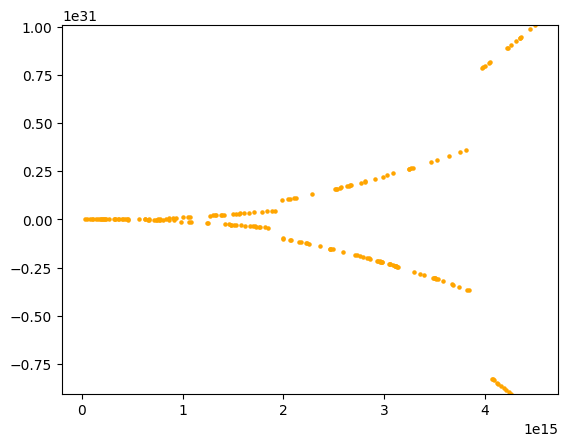

Ymin = -9.074489322305807e+30
Ymax = 1.0120912251027543e+31


In [16]:
y_min = 0
y_max = 0
xx = np.linspace(0, 1./get_eps(), 1000) # Из-за неточности формулы используем маленькие числа для проверки 
for x in xx: 
    y0 = cardano(1, 3, x**2, 3*x**2)[0]
    y = f(y0, x)
    if y != 0:
        y_max = max(y_max, y)
        y_min = min(y_min, y)
        plt.scatter(x, y, c = 'orange', s = 5)
plt.ylim(bottom = y_min, top = y_max)
plt.show()
print('Ymin = {0}'.format(y_min))
print('Ymax = {0}'.format(y_max))

Сравнение эффективости метода Кардано с методами Брента и Ньютона:

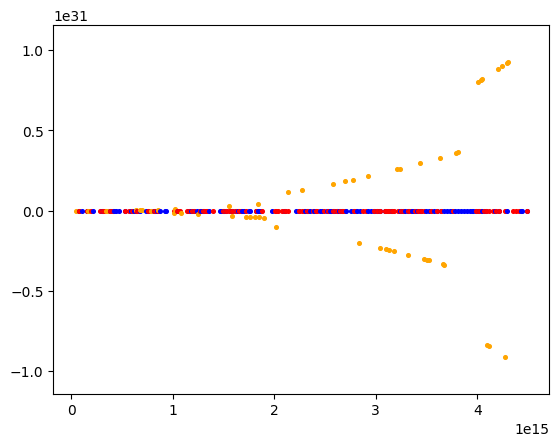

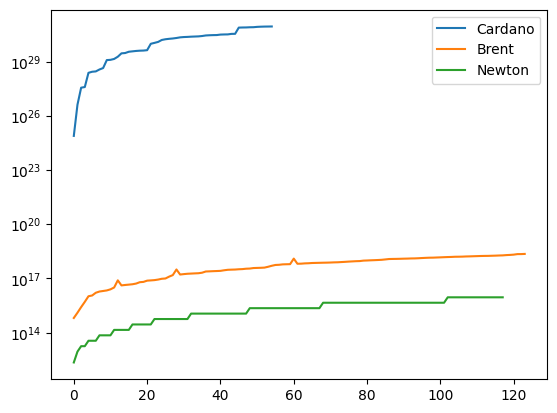

In [17]:
y_max = 0
y_min = 0
x_all=[]
y_all=[]
x__all=[]
x____all=[]
xx = np.linspace(0,  1./get_eps(), 300)

for x in xx: 
    expression = lambda _x:f(_x, x)

    cardano_y = f(cardano(1, 3, x**2, 3*x**2)[0], x)
    newton_y = f(opt.newton(expression, 0), x)
    brentq_y = f(opt.brentq(expression, -1000, 1000), x)
    
          
    if brentq_y != 0:
        x0=  f(opt.brentq(expression, -1000, 1000), x)
        x_all.append(x0)
        x_brent=x_all
        y_max = max(y_max, brentq_y)
        y_min = min(y_min, brentq_y)

        plt.scatter(x, newton_y, c = 'blue', s = 7)
    
    if newton_y != 0:
        x0=  f(opt.newton(expression, 0), x)
        y_all.append(x0)
        x_newton=y_all
        y_max = max(y_max, newton_y)
        y_min = min(y_min, newton_y)
        
        plt.scatter(x, newton_y, c = 'red', s = 7)
        
    if cardano_y != 0:
        x0=  f(cardano(1, 3, x**2, 3*x**2)[0], x)
        x__all.append(x0)
        x_car=x__all
        y_max = max(y_max, cardano_y)
        y_min = min(y_min, cardano_y)
        
        plt.scatter(x, cardano_y, c = 'orange', s = 7)
        
plt.ylim(bottom = y_min * 1.25, top = y_max * 1.25)
plt.show()
plt.semilogy(np.abs(np.array(x_car) - np.pi), label='Cardano')
plt.semilogy(np.abs(np.array(x_brent)  - np.pi), label='Brent')
plt.semilogy(np.abs(np.array(x_newton) - np.pi), label='Newton')
plt.legend()
pass

Вывод:

Анализируя график,можно сделать вывод, что метод Кардано делает больше ошибок при большем количестве значений на входе. А методы Брента и Ньютона делают практически одинаковое количество ошибок, но значительно меньше, чем с помощью метода Кардано.